### Using many kinds of machine learning classifiers to identify handwritten digits

#### Implemented models from scikit-learn (KMeans, KNeighbors, SupportVector, RandomForest) and TensorFlow (neural networks) with the mnist dataset

In [49]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
import random
from sklearn.datasets import fetch_openml
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

In [3]:
def display_digit(image):
    plt.figure(figsize=(3, 3))
    plt.imshow(image[0], cmap='gist_yarg')
    plt.show()

In [4]:
def sklearn_img(image):
    n, nx, ny = image.shape
    image = image.reshape(n, nx * ny)
    return image

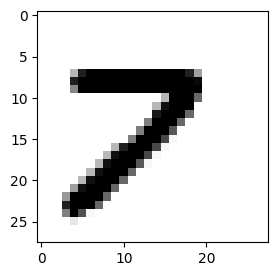

In [52]:
# Picks a random image to be identified
img = cv.imread(f"../digits/{random.randint(1, 20)}.png")[:, :, 0]
img = np.invert(np.array([img]))
display_digit(img)

# Scikit-learn

In [6]:
# mnist data
mnist = fetch_openml("mnist_784", parser="auto")
data = scale(mnist.data)
target = mnist.target

In [7]:
# Split data into train and test
x, y = data, target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

## KMeans

In [8]:
# Model training
kmmodel = KMeans(n_clusters=10, init="random", n_init=10)
kmmodel.fit(data);
# This unsupervised method cannot be evaluated with train/test split

In [53]:
# Predicting which number is written above
prediction = kmmodel.predict(sklearn_img(img))
print(f"To me this number looks like {prediction[0]}")

To me this number looks like 4


## KNeighbors

In [10]:
knmodel = KNeighborsClassifier(n_neighbors=3)
knmodel.fit(x_train, y_train)
print(f"Score using tests from dataset: {knmodel.score(x_test, y_test) * 100 :.2f}%")

Score using tests from dataset: 94.61%


In [54]:
prediction = knmodel.predict(sklearn_img(img))
print(f"To me this number looks like {prediction[0]}")

To me this number looks like 3


## SVC (Support Vector Classifier)

In [12]:
svmodel = SVC(kernel='linear', C=3, gamma="auto")
svmodel.fit(x_train, y_train)
print(f"Score using tests from dataset: {svmodel.score(x_test, y_test) * 100 :.2f}%")

Score using tests from dataset: 92.04%


In [55]:
prediction = svmodel.predict(sklearn_img(img))
print(f"To me this number looks like {prediction[0]}")

To me this number looks like 3


## Random Forest

In [50]:
rfmodel = RandomForestClassifier(n_estimators=100, max_depth=None)
rfmodel.fit(x_train, y_train)
print(f"Score using tests from dataset: {rfmodel.score(x_test, y_test) * 100 :.2f}%")

Score using tests from dataset: 96.73%


In [56]:
prediction = rfmodel.predict(sklearn_img(img))
print(f"To me this number looks like {prediction[0]}")

To me this number looks like 8


# Tensorflow

## Neural network

In [14]:
# Load trained model
model = tf.keras.models.load_model("../digits-neural-model")

***This trained model code is available [here](../neural-networks.ipynb)***

In [57]:
# Predicting which number is written above
prediction = model.predict(img)
number = np.argmax(prediction)
print(f"To me this number looks like {number}")

1/1 [==============================] - 0s 22ms/step
To me this number looks like 7
